<a href="https://colab.research.google.com/github/Argivist/AI_Model_Notebooks/blob/Tutorial_based/nerual%20net%20implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [ ]:
%pip install keras-tuner
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.9 MB/s eta 0:00:00


## Setting up import dependencies

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

## Attempting to activate any available gpu for faster training

In [ ]:
#getting all gpus
gpus=tf.config.experimental.list_physical_devices('GPU')
#limiting the gpu usage
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

# Load data


In [ ]:
data=pd.read_csv('//content//drive//My Drive//Intro to AI//churn//CustomerChurn_dataset.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Cleaning and preprocessing the data**

## Cleaning the data

Dropping any possible nas


In [ ]:
data.replace(' ',np.nan,inplace=True)
data.dropna(inplace=True)

converting the strings that are supposed to be doubles to doubles


In [ ]:
data['MonthlyCharges']=data['MonthlyCharges'].astype(float)
data['TotalCharges']=data['TotalCharges'].astype(float)

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Encoding and scaling categorical and numeric features repectively

### Separating categorical and quantitative features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
data_o=data.select_dtypes(include=['object'])
data_i=data
data_i.drop(np.array(data_o.columns),axis=1,inplace=True)


data_o=pd.concat([data_o,data['SeniorCitizen']],axis=1)
data_i.drop(['SeniorCitizen'],inplace=True,axis=1)


#customerID=data_o['customerID']
data_o.drop(['customerID'],axis=1,inplace=True)

### Encoding

In [ ]:
data_o=pd.get_dummies(data_o)

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(data_i)
data_i=pd.DataFrame(sc.transform(data_i),columns=data.columns)

### Joining the data

In [ ]:
data_i.reset_index(drop=True, inplace=True)
data_o.reset_index(drop=True, inplace=True)
data=pd.concat([data_o,data_i],axis=1)

# **Feature importance and Splitting**

In [ ]:
data

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,1,0,1,0,0,...,1,0,0,1,0,1,0,-1.280248,-1.161694,-0.994194
1,0,0,1,1,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0.064303,-0.260878,-0.173740
2,0,0,1,1,0,1,0,0,1,1,...,1,0,0,0,1,0,1,-1.239504,-0.363923,-0.959649
3,0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0.512486,-0.747850,-0.195248
4,0,1,0,1,0,1,0,0,1,1,...,1,0,0,1,0,0,1,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,1,0,0,0,1,1,0,-0.343137,0.664868,-0.129180
7028,0,1,0,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1.612573,1.276493,2.241056
7029,0,1,0,0,1,0,1,1,0,0,...,1,0,0,1,0,1,0,-0.872808,-1.170004,-0.854514
7030,1,0,1,0,1,1,0,0,1,0,...,1,0,0,0,1,0,1,-1.158016,0.319168,-0.872095


In [ ]:
from sklearn.ensemble import RandomForestClassifier
Y=data[['Churn_No','Churn_Yes']]
X=data.drop(['Churn_No','Churn_Yes'],axis=1)
model=RandomForestClassifier()
model.fit(X,Y)

importance=model.feature_importances_

In [ ]:
feature_imp={}
for i,j in enumerate(importance):
  feature_imp[X.columns[i]]=[j]
feature_imp=dict(sorted(feature_imp.items(),key=lambda item:item[1],reverse=True))
fi=pd.DataFrame(feature_imp).transpose()

## EDA graph

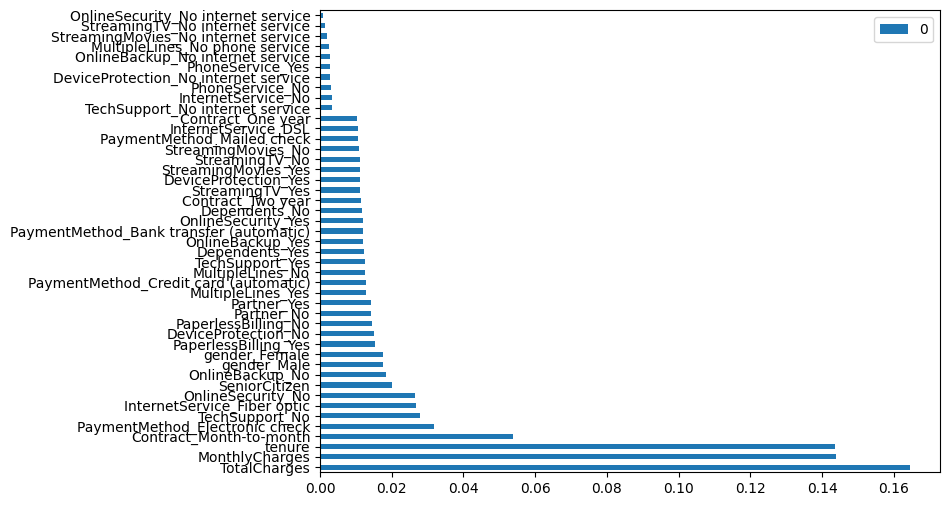

In [ ]:
fi.plot(kind='barh',figsize=(8,6))
plt.show()

In [ ]:
X_select=data[[col for col,imp in feature_imp.items() if imp[0]>0.1]]

## Using Select K best
alternative to feature selection

In [ ]:
Y_=data[['Churn_Yes']]
X=data.drop(['Churn_No','Churn_Yes'],axis=1)
from sklearn.feature_selection import SelectKBest,f_classif

st=SelectKBest(f_classif,k=3)

X_select=st.fit_transform(X,Y_)
X_select=pd.DataFrame(X_select,columns=X.columns[st.get_support()])

print("The selected features are ")
for i in X_select.columns:
  print(i)

The selected features are 
OnlineSecurity_No
Contract_Month-to-month
tenure


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Splitting the data into trainig and testing set

In [ ]:
from sklearn.model_selection import train_test_split
# pulling global training data out as temp
Xtemp,Xtest,Ytemp,Ytest=train_test_split(X_select,Y,test_size=0.15,random_state=42)
# pulling local training,validation and training set out
Xtrain,X_tv,Ytrain,Y_tv=train_test_split(X_select,Y,test_size=0.2,random_state=42)
Xtest_,Xval,Ytest_,Yval=train_test_split(X_tv,Y_tv,test_size=0.5,random_state=42)

# Multi-layered perceptron model training

## Additional Dependencies

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
import kerastuner as kt
from tensorflow.keras.layers import Flatten,Dense,Activation,Dropout,Input
#from keras.optimizers import SGD

<ipython-input-22-8f5e007044fe>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


## Cross vlidation

## Building and configuring the model


In [ ]:
input_dim=X_select.columns.__len__()

def hptuneModel(hp):
  inputs=Input(shape=(input_dim,))
  x=Dense(hp.Int('units_0',min_value=10,max_value=100,step=10),
  activation=hp.Choice('activation',values=['relu','sigmoid','tanh'],default='relu'))(inputs)
  for i in range(hp.Int('num_layers', 2, 20)):
    x=Dense(hp.Int('units_'+str(i), min_value=10,max_value=100,step=10),activation=hp.Choice('activation',values=['relu','sigmoid','tanh']),input_shape=(input_dim,))(x)
  outputs=Dense(2,activation='sigmoid')(x)
  model=keras.Model(inputs=inputs,outputs=outputs)
  model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-5])),metrics=[tf.keras.metrics.BinaryAccuracy(name='acc')])
  return model

## Hyper parameter tuning

### setting up tuner

In [ ]:
tuner= kt.Hyperband(hptuneModel,objective=kt.Objective("val_accuracy",direction="max"),max_epochs=100,hyperband_iterations=1,factor=10)#,directory='tuning_dir',project_name='sample')

Reloading Tuner from ./untitled_project/tuner0.json


### hyper parameter tuning

In [ ]:
tuner.search(Xtrain,Ytrain,epochs=100,validation_data=(Xval,Yval))

Trial 131 Complete [00h 02m 24s]
val_accuracy: 0.7819905281066895

Best val_accuracy So Far: 0.789889395236969
Total elapsed time: 00h 31m 01s


### summary of best model

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0126 summary
Hyperparameters:
units_0: 90
activation: sigmoid
num_layers: 6
units_1: 40
learning_rate: 0.001
units_2: 90
units_3: 90
units_4: 20
units_5: 70
units_6: 70
units_7: 100
units_8: 70
units_9: 70
units_10: 30
units_11: 70
units_12: 30
units_13: 60
units_14: 70
units_15: 60
units_16: 100
units_17: 10
units_18: 10
units_19: 80
tuner/epochs: 100
tuner/initial_epoch: 10
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0115
Score: 0.789889395236969

Trial 0127 summary
Hyperparameters:
units_0: 40
activation: tanh
num_layers: 16
units_1: 50
learning_rate: 0.001
units_2: 10
units_3: 90
units_4: 100
units_5: 100
units_6: 50
units_7: 80
units_8: 70
units_9: 70
units_10: 80
units_11: 10
units_12: 70
units_13: 70
units_14: 80
units_15: 10
units_16: 70
units_17: 30
units_18: 20
units_19: 20
tuner/epochs: 100
tuner/initial_epoch: 10
tuner/bracket: 1
tuner/round: 1
tun

### Getting the best Model

In [ ]:
bestModel=tuner.get_best_models(num_models=1)[0]

### Evaluating the best model

In [ ]:
loss,accuracy=bestModel.evaluate(Xtest_,Ytest_)

47/47 [==============================] - 1s 4ms/step - loss: 0.4725 - accuracy: 0.7678


## Retraining the best model

In [ ]:
bestModel.fit(Xtemp,Ytemp)

187/187 [==============================] - 3s 5ms/step - loss: 0.4523 - accuracy: 0.7720


### Loss

In [ ]:
fig=plt.figure()

plt.plot(bestModel.history.history['loss'],color='orange',label='loss')
plt.plot(bestModel.history.history['val_loss'],color='red',label='val_loss')

fig.suptitle("Loss",fontsize=20)

plt.legend(loc='upper left')
plt.show()

TypeError: ignored

<Figure size 640x480 with 0 Axes>

### Accuracy

In [ ]:
fig=plt.figure()

plt.plot(bestModel.history.history['accuracy'],color='teal',label='accuracy')
plt.plot(bestModel.history.history['val_accuracy'],color='green',label='val_accuracy')

fig.suptitle("Loss",fontsize=20)

plt.legend(loc='upper left')
plt.show()

TypeError: ignored

<Figure size 640x480 with 0 Axes>

## Evaluating the models Performance

In [ ]:
bestModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 90)                360       
                                                                 
 dense_1 (Dense)             (None, 90)                8190      
                                                                 
 dense_2 (Dense)             (None, 40)                3640      
                                                                 
 dense_3 (Dense)             (None, 90)                3690      
                                                                 
 dense_4 (Dense)             (None, 90)                8190      
                                                                 
 dense_5 (Dense)             (None, 20)                1820  

### Loss

In [ ]:
fig = plt.figure()

plt.plot(bestModel.history.history['loss'], color='orange', label='loss')
plt.plot(bestModel.history.history['val_loss'], color='red', label='val_loss')


fig.suptitle("Loss",fontsize=20)

plt.legend(loc='upper left')
plt.show()

### Accuracy

In [ ]:
fig=plt.figure()

plt.plot(bestModel.history.history['accuracy'],color='teal',label='accuracy')
plt.plot(bestModel.history.history['val_accuracy'],color='green',label='val_accuracy')

fig.suptitle("Accuracy",fontsize=20)

plt.legend(loc='upper left')
plt.show()

TypeError: ignored

<Figure size 640x480 with 0 Axes>

### eval

In [ ]:
loss,accuracy=bestModel.evaluate(Xtest,Ytest)

33/33 [==============================] - 0s 4ms/step - loss: 0.4802 - accuracy: 0.7754


### the hyperparameters

In [ ]:
best_hp = tuner.get_best_hyperparameters()[0]
pd.DataFrame(best_hp.values, index=[0]).transpose()

,0
units_0,90
activation,sigmoid
num_layers,6
units_1,40
learning_rate,0.001
units_2,90
units_3,90
units_4,20
units_5,70
units_6,70


# Testing and evaluating the models accuracy

### Evaluating model post training

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
precision=Precision()
recall=Recall()
accuracy=BinaryAccuracy()

In [ ]:
Ypred=bestModel.predict(Xtest)
precision.update_state(Ytest,Ypred)
recall.update_state(Ytest,Ypred)
accuracy.update_state(Ytest,Ypred)

33/33 [==============================] - 0s 2ms/step


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2110.0>

In [ ]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:0.7801147103309631, Recall:0.7734597325325012, Accuracy:0.777725100517273


### sep

In [ ]:
bestModel.predict(pd.DataFrame(a))

1/1 [==============================] - 0s 126ms/step


array([[0.7142829, 0.2861556]], dtype=float32)

In [ ]:
a=pd.DataFrame(Xtest.iloc(axis=0)[80]).transpose()

In [ ]:
Ytest.iloc(axis=0)[80]

Churn_No     1
Churn_Yes    0
Name: 101, dtype: uint8

In [ ]:
Ytest

,Churn_No,Churn_Yes
2476,1,0
6773,1,0
6116,0,1
3047,1,0
4092,1,0
...,...,...
2208,1,0
4216,1,0
4615,1,0
3765,0,1


# Packing model

In [ ]:
bestModel.save(os.path.join('//content//drive//MyDrive//Intro to AI','model','CustomerChurn.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
